In [74]:
!pip install opencv-python
!pip install PyWavelets
!pip install opencv-python
!pip install Scikit-learn
!pip install pandas

In [75]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [76]:
img = cv2.imread('C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\download.jpg')

In [77]:
img.shape

(259, 194, 3)

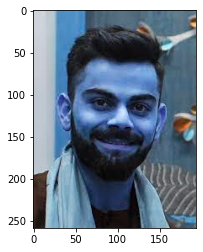

In [78]:
plt.imshow(img)

In [79]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(259, 194)

In [80]:
gray

array([[214, 214, 214, ..., 125, 132, 132],
       [214, 214, 214, ..., 126, 129, 129],
       [214, 214, 214, ..., 127, 125, 125],
       ...,
       [ 37,  34,  29, ..., 103, 121, 121],
       [ 37,  34,  29, ..., 103, 112, 112],
       [ 37,  34,  29, ..., 103, 102, 102]], dtype=uint8)

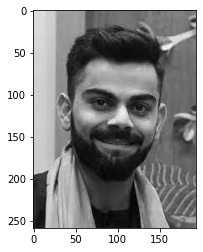

In [81]:
plt.imshow(gray, cmap='gray')

In [82]:
face_cascade=cv2.CascadeClassifier("C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\file1_def.xml")
eye_cascade=cv2.CascadeClassifier("C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\file1_eye.xml")
faces=face_cascade.detectMultiScale(gray,1.5,3)
faces

array([[ 41,  66, 122, 122]])

In [83]:
(x,y,w,h)=faces[0]
x,y,w,h

(41, 66, 122, 122)

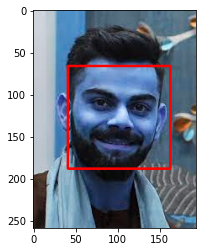

In [84]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

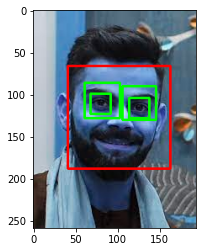

In [85]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

(122, 122, 3)

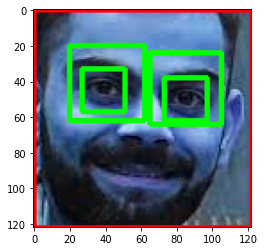

In [86]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')
cropped_img=np.array(roi_color)
cropped_img.shape

In [87]:
import pywt
import cv2
import numpy as np
def w2d(img,mode='har',level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H=np.uint8(imArray_H)
    return imArray_H

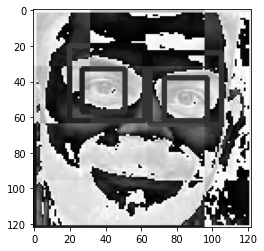

In [88]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [89]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

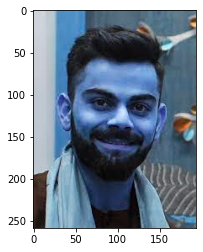

In [90]:
original_image=cv2.imread("C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\download.jpg")
plt.imshow(original_image)

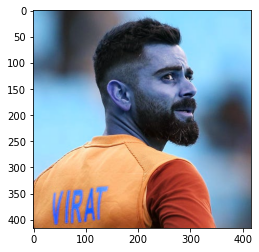

In [91]:
cropped_img=cv2.imread("C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\0x0.jpg")
plt.imshow(cropped_img)

In [92]:
cropped_img_no_2_eyes=get_cropped_image_if_2_eyes("C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\0x0.jpg")
cropped_img_no_2_eyes

In [93]:
path_to_data="C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset"
path_to_cr_data="C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\cropped"

In [94]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [95]:
img_dirs

['C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\cropped',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedlionel_messi',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedmaria_sharapova',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedroger_federer',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedserena_williams',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedvirat_kohli',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\lionel_messi',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\maria_sharapova',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\roger_federer',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\serena_williams',
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\virat_kohli']

In [96]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [97]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("\\")[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped image in folder: ', cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
croppedlionel_messi
Generating cropped image in folder:  C:\Users\Harika\OneDrive\Desktop\1stop\dataset\croppedcroppedlionel_messi
croppedmaria_sharapova
Generating cropped image in folder:  C:\Users\Harika\OneDrive\Desktop\1stop\dataset\croppedcroppedmaria_sharapova
croppedroger_federer
Generating cropped image in folder:  C:\Users\Harika\OneDrive\Desktop\1stop\dataset\croppedcroppedroger_federer
croppedserena_williams
Generating cropped image in folder:  C:\Users\Harika\OneDrive\Desktop\1stop\dataset\croppedcroppedserena_williams
croppedvirat_kohli
Generating cropped image in folder:  C:\Users\Harika\OneDrive\Desktop\1stop\dataset\croppedcroppedvirat_kohli
lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [98]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split("//")[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi': ['C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi\\croppedlionel_messi1.png',
  'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi\\croppedlionel_messi10.png',
  'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi\\croppedlionel_messi11.png',
  'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi\\croppedlionel_messi12.png',
  'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi\\croppedlionel_messi13.png',
  'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi\\croppedlionel_messi14.png',
  'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi\\croppedlionel_messi15.png',
  'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi\\croppedlionel_messi16.png',
  'C:\\Users\

In [99]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi': 0,
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedmaria_sharapova': 1,
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedroger_federer': 2,
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedserena_williams': 3,
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedvirat_kohli': 4}

In [100]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [101]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape
len(X)

134

In [102]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)


0.7352941176470589

In [104]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.54      1.00      0.70         7
           2       1.00      0.40      0.57         5
           3       0.60      0.60      0.60         5
           4       1.00      0.62      0.77         8

    accuracy                           0.74        34
   macro avg       0.81      0.70      0.71        34
weighted avg       0.82      0.74      0.73        34



In [105]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [106]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [107]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_

    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.74,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.56,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.83,{'logisticregression__C': 5}


In [108]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [109]:
best_estimators['svm'].score(x_test,y_test)

0.7352941176470589

In [110]:
best_estimators['random_forest'].score(x_test,y_test)

0.6176470588235294

In [111]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8235294117647058

In [112]:
best_clf=best_estimators['svm']

In [113]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[8, 0, 0, 1, 0],
       [0, 7, 0, 0, 0],
       [0, 2, 2, 1, 0],
       [0, 2, 0, 3, 0],
       [0, 0, 1, 2, 5]], dtype=int64)

In [114]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(69.0, 0.5, 'Truth')

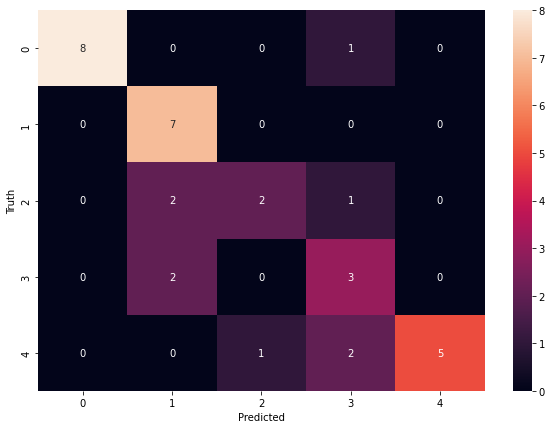

In [115]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [116]:
class_dict

{'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedlionel_messi': 0,
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedmaria_sharapova': 1,
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedroger_federer': 2,
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedserena_williams': 3,
 'C:\\Users\\Harika\\OneDrive\\Desktop\\1stop\\dataset\\croppedcroppedvirat_kohli': 4}

In [117]:
!pip install joblib
import joblib
joblib.dump(best_clf,'saves_model.pkl')

['saves_model.pkl']

In [118]:
import json
with open('class_dictionary.json',"w") as f:
    f.write(json.dumps(class_dict))